In [1]:
%logstop
%logstart -ortq ~/.logs/dw.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
from static_grader import grader

# DW Miniproject
## Introduction

The objective of this miniproject is to exercise your ability to wrangle tabular data set and aggregate large data sets into meaningful summary statistics. We'll work with the same medical data used in the `pw` miniproject but leverage the power of Pandas to more efficiently represent and act on our data.

## Downloading the data

We first need to download the data we'll be using from Amazon S3:

In [3]:
!mkdir dw-data
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/practices.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/chem.csv.gz -nc -P ./dw-data/

mkdir: cannot create directory ‘dw-data’: File exists
File ‘./dw-data/201701scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/201606scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/practices.csv.gz’ already there; not retrieving.

File ‘./dw-data/chem.csv.gz’ already there; not retrieving.



## Loading the data

Similar to the `PW` miniproject, the first step is to read in the data. The data files are stored as compressed CSV files. You can load the data into a Pandas DataFrame by making use of the `gzip` package to decompress the files and Panda's `read_csv` methods to parse the data into a DataFrame. You may want to check the Pandas documentation for parsing [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) files for reference.

For a description of the data set please, refer to the [PW miniproject](./pw.ipynb). **Note that all questions make use of the 2017 data only, except for Question 5 which makes use of both the 2017 and 2016 data.**

In [4]:
import pandas as pd
import numpy as np
import gzip

In [5]:
# load the 2017 data
scripts = pd.read_csv("dw-data/201701scripts_sample.csv.gz")
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [6]:
col_names=[ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
practices = pd.read_csv('./dw-data/practices.csv.gz', names=col_names)
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [7]:
chem = pd.read_csv("dw-data/chem.csv.gz")
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


Now that we've loaded in the data, let's first replicate our results from the `PW` miniproject. Note that we are now working with a larger data set so the answers will be different than in the `PW` miniproject even if the analysis is the same.

## Question 1: summary_statistics

In the `PW` miniproject we first calculated the total, mean, standard deviation, and quartile statistics of the `'items'`, `'quantity'`', `'nic'`, and `'act_cost'` fields. To do this we had to write some functions to calculate the statistics and apply the functions to our data structure. The DataFrame has a `describe` method that will calculate most (not all) of these things for us.

Submit the summary statistics to the grader as a list of tuples: [('act_cost', (total, mean, std, q25, median, q75)), ...]

In [8]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [9]:
summary = pd.DataFrame(scripts.describe())
summary

,items,nic,act_cost,quantity
count,973193.000000,973193.000000,973193.000000,973193.000000
mean,9.133136,73.058915,67.986613,741.329835
std,29.204198,188.070257,174.401703,3665.426958
min,1.000000,0.000000,0.040000,0.000000
25%,1.000000,7.800000,7.330000,28.000000
50%,2.000000,22.640000,21.220000,100.000000
75%,6.000000,65.000000,60.670000,350.000000
max,2384.000000,16320.000000,15108.320000,577720.000000


In [10]:
scripts_sum = scripts[['items', 'nic', 'act_cost', 'quantity']].agg(['sum'])
scripts_sum

,items,nic,act_cost,quantity
sum,8888304,71100424.84,66164096.12,721457006


In [11]:
scripts_output = pd.concat([scripts_sum, summary.drop(['count','min','max'])])
scripts_output

,items,nic,act_cost,quantity
sum,8.888304e+06,7.110042e+07,6.616410e+07,7.214570e+08
mean,9.133136e+00,7.305892e+01,6.798661e+01,7.413298e+02
std,2.920420e+01,1.880703e+02,1.744017e+02,3.665427e+03
25%,1.000000e+00,7.800000e+00,7.330000e+00,2.800000e+01
50%,2.000000e+00,2.264000e+01,2.122000e+01,1.000000e+02
75%,6.000000e+00,6.500000e+01,6.067000e+01,3.500000e+02


In [12]:
act_cost_l = []
for i in scripts_output['act_cost']:
    act_cost_l.append(i)
    
nic_l = []
for i in scripts_output['nic']:
    nic_l.append(i)

items_l = []
for i in scripts_output['items']:
    items_l.append(i)
    
quantity_l = []
for i in scripts_output['quantity']:
    quantity_l.append(i)

#print(output_list_of_tuples)   
output_list = [('items', tuple(items_l)), ('quantity', tuple(quantity_l)), ('nic', tuple(nic_l)),('act_cost', tuple(act_cost_l))]

In [13]:
def summary_stats():
    return output_list
    #return [('items', (0,) * 6), ('quantity', (0,) * 6), ('nic', (0,) * 6), ('act_cost', (0,) * 6)]

In [14]:
grader.score.dw__summary_statistics(summary_stats)

Your score:  1.0


## Question 2: most_common_item

We can also easily compute summary statistics on groups within the data. In the `pw` miniproject we had to explicitly construct the groups based on the values of a particular field. Pandas will handle that for us via the `groupby` method. This process is [detailed in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Use `groupby` to calculate the total number of items dispensed for each `'bnf_name'`. Find the item with the highest total and return the result as `[(bnf_name, total)]`.

In [15]:
def most_common_item():
    sums = scripts.groupby('bnf_name')['items'].sum()
    item = sums.idxmax()
    max_item = [(item, sums[item])]
    return [item]

In [16]:
highest_return = most_common_item()
highest_return

['Omeprazole_Cap E/C 20mg']

In [17]:
most_common_item = [('Omeprazole_Cap E/C 20mg', 218583)]

In [18]:
grader.score.dw__most_common_item(most_common_item)

Your score:  1.0


## Question 3: items_by_region

Now let's find the most common item by post code. The post code information is in the `practices` DataFrame, and we'll need to `merge` it into the `scripts` DataFrame. Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data. The `merge` method is only one of many possible options.

Return your results as a list of tuples `(post code, item name, amount dispensed as % of total)`. Sort your results ascending alphabetically by post code and take only results from the first 100 post codes.

**NOTE:** Some practices have multiple postal codes associated with them. Use the alphabetically first postal code. Note some postal codes may have multiple `'bnf_name'` with the same prescription rate for the maximum. In this case, take the alphabetically first `'bnf_name'` (as in the PW miniproject).

In [19]:
# Create a list of unique practices
unique_practices = (practices.sort_values('post_code').groupby('code').first().reset_index())

# Merge scripts and unique_practices DataFrame
joined = scripts.merge(unique_practices[['code', 'post_code']], left_on='practice', right_on='code', how='left')

# Group 'joined' by 'post_code' and 'bnf_name'
post_item_totals = joined.groupby(['post_code', 'bnf_name'])['items'].sum().reset_index()

# Group 'post_item_totals' by 'post_code', get 'idxmax'
max_idx = post_item_totals.groupby('post_code')['items'].idxmax()

# Use list of idx to filter 'post_item_totals'
max_items = post_item_totals.loc[max_idx].set_index('post_code')

# Get 'items' totals for each 'post_code'
post_totals = joined.groupby('post_code')['items'].sum().rename('post_item')

# Combine 'max_items' and 'post_totals' 
max_items = pd.concat([max_items, post_totals], axis=1)

# Create 'proportion' column
max_items['proportion'] = max_items['items'] / max_items['post_item']

# Drop columns
max_items.drop(['items', 'post_item'], axis=1, inplace=True)

In [20]:
max_items.head()

,bnf_name,proportion
post_code,,
B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,0.031059
B12 9LP,Paracet_Tab 500mg,0.024893
B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,0.027111
B21 9RY,Metformin HCl_Tab 500mg,0.033294
B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),0.021384


In [21]:
items_by_region = list(max_items.itertuples(name=None))[:100]

In [22]:
#items_by_region = [("B11 4BW", "Salbutamol_Inha 100mcg (200 D) CFF", 0.0310589063)] * 100

In [23]:
grader.score.dw__items_by_region(items_by_region)

Your score:  1.0


## Question 4: script_anomalies

Drug abuse is a source of human and monetary costs in health care. A first step in identifying practitioners that enable drug abuse is to look for practices where commonly abused drugs are prescribed unusually often. Let's try to find practices that prescribe an unusually high amount of opioids. The opioids we'll look for are given in the list below.

In [24]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

These are generic names for drugs, not brand names. Generic drug names can be found using the `'bnf_code'` field in `scripts` along with the `chem` table.. Use the list of opioids provided above along with these fields to make a new field in the `scripts` data that flags whether the row corresponds with a opioid prescription.

In [25]:
scripts.head(5)

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [26]:
# create 'opioid' column in 'scripts' table
mask = chem['NAME'].str.contains('|'.join(opioids), case=False)
bad_drugs = chem[mask]['CHEM SUB'].unique()

# Merge 'scripts' and 'chem' DataFrame
scripts['opioid'] = scripts['bnf_code'].isin(bad_drugs).astype(int)
scripts.groupby(['practice'])['opioid'].count()

practice
A81005    1507
A81007    1454
A81011    1568
A81012    1332
A81017    2150
          ... 
Y05570      22
Y05583      28
Y05597      18
Y05660     347
Y05670      12
Name: opioid, Length: 856, dtype: int64

In [27]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,0
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,0
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,0
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,0
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,0


In [28]:
scripts[scripts['opioid']==1].head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,opioid
6,N85639,0407010F0,Co-Codamol_Cap 30mg/500mg,1,0.84,0.89,24,1
7,N85639,0407010F0,Zapain_Tab 30mg/500mg,1,3.03,2.82,100,1
527,N81013,0407010F0,Co-Codamol_Tab 8mg/500mg,37,101.91,96.13,3446,1
528,N81013,0407010F0,Co-Codamol Eff_Tab 8mg/500mg,1,8.53,8.01,124,1
529,N81013,0407010F0,Co-Codamol_Tab 30mg/500mg,14,59.39,55.36,1496,1


Now for each practice calculate the proportion of its prescriptions containing opioids.

**Hint:** Consider the following list: `[0, 1, 1, 0, 0, 0]`. What proportion of the entries are 1s? What is the mean value?

In [29]:
opioids_per_practice = scripts.groupby('practice')['opioid'].mean()

In [30]:
opioids_per_practice.head()

practice
A81005    0.033179
A81007    0.043329
A81011    0.046556
A81012    0.042793
A81017    0.038140
Name: opioid, dtype: float64

How do these proportions compare to the overall opioid prescription rate? Subtract off the proportion of all prescriptions that are opioids from each practice's proportion.

In [31]:
relative_opioids_per_practice = opioids_per_practice - scripts['opioid'].mean()
#scripts['opioid'].means() = overall_opioids_rate

In [32]:
relative_opioids_per_practice.head()

practice
A81005   -0.002624
A81007    0.007526
A81011    0.010753
A81012    0.006990
A81017    0.002337
Name: opioid, dtype: float64

Now that we know the difference between each practice's opioid prescription rate and the overall rate, we can identify which practices prescribe opioids at above average or below average rates. However, are the differences from the overall rate important or just random deviations? In other words, are the differences from the overall rate big or small?

To answer this question we have to quantify the difference we would typically expect between a given practice's opioid prescription rate and the overall rate. This quantity is called the **standard error**, and is related to the **standard deviation**, $\sigma$. The standard error in this case is

$$ \frac{\sigma}{\sqrt{n}} $$

where $n$ is the number of prescriptions each practice made. Calculate the standard error for each practice. Then divide `relative_opioids_per_practice` by the standard errors. We'll call the final result `opioid_scores`.

In [33]:
standard_error_per_practice = scripts['opioid'].std() / np.sqrt(scripts.practice.value_counts()) 
opioid_scores = relative_opioids_per_practice / standard_error_per_practice

In [34]:
opioid_scores.head()

A81005   -0.548306
A81007    1.544557
A81011    2.291795
A81012    1.373060
A81017    0.583168
dtype: float64

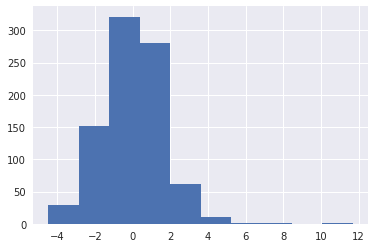

In [35]:
opioid_scores.hist()

The quantity we have calculated in `opioid_scores` is called a **z-score**:

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} $$

Here $\bar{X}$ corresponds with the proportion for each practice, $\mu$ corresponds with the proportion across all practices, $\sigma^2$ corresponds with the variance of the proportion across all practices, and $n$ is the number of prescriptions made by each practice. Notice $\bar{X}$ and $n$ will be different for each practice, while $\mu$ and $\sigma$ are determined across all prescriptions, and so are the same for every z-score. The z-score is a useful statistical tool used for hypothesis testing, finding outliers, and comparing data about different types of objects or events.

Now that we've calculated this statistic, take the 100 practices with the largest z-score. Return your result as a list of tuples in the form `(practice_name, z-score, number_of_scripts)`. Sort your tuples by z-score in descending order. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [36]:
unique_practices = (practices.sort_values(['code', 'name']).drop_duplicates( subset=['code'], keep='first'))[['code','name']]

results = unique_practices.merge(opioid_scores.rename('score'), left_on='code', right_index=True)

results = results.merge(scripts['practice'].value_counts().rename('count'), left_on='code', right_index=True)

results.sort_values(by='score', ascending=False, inplace=True)

results.drop('code', axis=1, inplace=True)

anomalies = list(results.itertuples(index=False, name=None))[:100]

In [37]:
results.head()

,name,score,count
7954,NATIONAL ENHANCED SERVICE,11.695818,7
8456,OUTREACH SERVICE NH / RH,7.339043,2
8783,BRISDOC HEALTHCARE SERVICES OOH,6.150582,60
7454,H&R P C SPECIAL SCHEME,5.123032,36
9718,HMR BARDOC OOH,4.958866,321


In [65]:
grader.score.dw__script_anomalies(anomalies)

Your score:  1.0


## Question 5: script_growth

Another way to identify anomalies is by comparing current data to historical data. In the case of identifying sites of drug abuse, we might compare a practice's current rate of opioid prescription to their rate 5 or 10 years ago. Unless the nature of the practice has changed, the profile of drugs they prescribe should be relatively stable. We might also want to identify trends through time for business reasons, identifying drugs that are gaining market share. That's what we'll do in this question.

We'll load in beneficiary data from 6 months earlier, June 2016, and calculate the percent growth in prescription rate from June 2016 to January 2017 for each `bnf_name`. We'll return the 50 items with largest growth and the 50 items with the largest shrinkage (i.e. negative percent growth) as a list of tuples sorted by growth rate in descending order in the format `(script_name, growth_rate, raw_2016_count)`. You'll notice that many of the 50 fastest growing items have low counts of prescriptions in 2016. Filter out any items that were prescribed less than 50 times.

In [39]:
scripts16 = pd.read_csv('./dw-data/201606scripts_sample.csv.gz')

In [40]:
# calculate the growth rate
growth = (scripts.bnf_name.value_counts() - scripts16.bnf_name.value_counts())/scripts16.bnf_name.value_counts()

In [41]:
# Combine the two series in a Dataframe
resp = pd.DataFrame(dict(growth = growth, item16 = scripts16.bnf_name.value_counts())).reset_index()

In [42]:
# Get rid of Nans
resp.fillna(0, inplace=True)

In [43]:
# Remove elements with less then 50 prescriptions
resp = resp[resp['item16'] >= 50]

In [44]:
# Sort by growth rate
resp.sort_values(by='growth', ascending = False, inplace=True)

In [45]:
#Pick the top 50 and last 50 and get the tuple list
script_growth = list(pd.concat([resp.head(50), resp.tail(50)]).itertuples(index=False, name=None))

In [46]:
# = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

In [47]:
grader.score.dw__script_growth(script_growth)

Error!
You have been rate limited for exceeding the limit of 3 per 1 minute.
Please slow down your submission rate.


## Question 6: rare_scripts

Does a practice's prescription costs originate from routine care or from reliance on rarely prescribed treatments? Commonplace treatments can carry lower costs than rare treatments because of efficiencies in large-scale production. While some specialist practices can't help but avoid prescribing rare medicines because there are no alternatives, some practices may be prescribing a unnecessary amount of brand-name products when generics are available. Let's identify practices whose costs disproportionately originate from rarely prescribed items.

First we have to identify which `'bnf_code'` are rare. To do this, find the probability $p$ of a prescription having a particular `'bnf_code'` if the `'bnf_code'` was randomly chosen from the unique options in the beneficiary data. We will call a `'bnf_code'` rare if it is prescribed at a rate less than $0.1p$.

In [48]:
p = 1/scripts.bnf_code.nunique()

rates = scripts['bnf_code'].value_counts() / len(scripts)

mask = rates < .1 * p

rare_codes = rates[mask].index.unique()

scripts['rare'] = scripts['bnf_code'].isin(rare_codes)

Now for each practice, calculate the proportion of costs that originate from prescription of rare treatments (i.e. rare `'bnf_code'`). Use the `'act_cost'` field for this calculation.

In [61]:
# rare script act_cost per practice/total act_cost per practice
rare_cost_prop = (scripts[scripts['rare']].groupby('practice')['act_cost'].sum()/scripts.groupby('practice')['act_cost'].sum()).fillna(0)
rare_cost_prop

practice
A81005    0.012017
A81007    0.008381
A81011    0.005116
A81012    0.013747
A81017    0.007359
            ...   
Y05570    0.000000
Y05583    0.000000
Y05597    0.000000
Y05660    0.000323
Y05670    0.000000
Name: act_cost, Length: 856, dtype: float64

Now we will calculate a z-score for each practice based on this proportion.
First take the difference of `rare_cost_prop` and the proportion of costs originating from rare treatments across all practices.

In [60]:
relative_rare_cost_prop = (rare_cost_prop - scripts[scripts['rare']]['act_cost'].sum() /scripts['act_cost'].sum())
relative_rare_cost_prop

practice
A81005   -0.003946
A81007   -0.007582
A81011   -0.010847
A81012   -0.002216
A81017   -0.008604
            ...   
Y05570   -0.015963
Y05583   -0.015963
Y05597   -0.015963
Y05660   -0.015640
Y05670   -0.015963
Name: act_cost, Length: 856, dtype: float64

Now we will estimate the standard errors (i.e. the denominator of the z-score) by simply taking the standard deviation of this difference.

In [58]:
standard_error = relative_rare_cost_prop.std()
standard_error

0.06050888706745139

Finally compute the z-scores. Return the practices with the top 100 z-scores in the form `(post_code, practice_name, z-score)`. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [62]:
rare_scores = relative_rare_cost_prop/standard_error
rare_scores

practice
A81005   -0.065216
A81007   -0.125308
A81011   -0.179263
A81012   -0.036615
A81017   -0.142190
            ...   
Y05570   -0.263811
Y05583   -0.263811
Y05597   -0.263811
Y05660   -0.258473
Y05670   -0.263811
Name: act_cost, Length: 856, dtype: float64

In [66]:
unique_practices = (practices
                   .sort_values('name')
                   .groupby('code')
                   .first()
                   .reset_index())[['code', 'name']].rename(columns={'code':'practice'})

unique_practices.set_index('practice', inplace=True)

rare_scores = pd.concat([unique_practices, rare_scores], axis =1).sort_values(by='act_cost', ascending=False).head(100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [69]:
rare_scripts = list(rare_scores.itertuples(name=None))

In [70]:
grader.score.dw__rare_scripts(rare_scripts)

Your score:  1.0


*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*